 ### ![alt text](../mini_logo.png "Title") Notebook - Demo exoSpin package - TEST VERSION


#### **1 - Imports**


In [1]:
# Imports

import sys

# Give the path to ForMoSA to be able to import it. No need when this will be a pip package
base_path = '../exoSpin' 
sys.path.append(base_path)

import numpy as np
import matplotlib as plt
from obliquity import *

#### **2 - Inputs**

The main function of the exoSpin package is <font color='#3498DB'>**obliquity()**</font>.

It takes as inputs path files for all parameters with a lot of data as the orbital inclination, 
the radius, etc.. or values as the period or the mass of the exoplanet.

For more details, go to the obliquity documentation.

In [2]:
# File paths & values for AB Pic b.
exoplanet_name = 'AB Pic b'
io = 'data/io.dat'
radius = 'data/rp_vrot.txt'
vsini = 'data/rp_vrot.txt'
omega = 57
P = 2.1
M = 10

#### **3 - Obliquity()**

The only thing you have to do is just calling the function <font color='#3498DB'>**obliquity()**</font> with all the inputs

After the calling of the function, an input user will be command: **Which method of computing do you want? (easy/complex)**

You just have to choose between easy or complex.

At the end you will get a nice plot of the planet's obliquity.


Initializing ExoSpin ...

-> ExoSpin Configuration

-> ExoSpin Computing



Complex method computing ...
[90.83344146 90.54431747 91.02837759 ... 90.36261696 90.62131793
 90.57208991] km / s 8567
[3.77109426 3.74848388 3.94609783 ... 3.80439324 3.79429851 3.78605839] km / s 8567

-> ExoSpin Plot

[0.    0.    0.275 0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.275 0.    0.   ]
[0.    0.    0.275 0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0. 

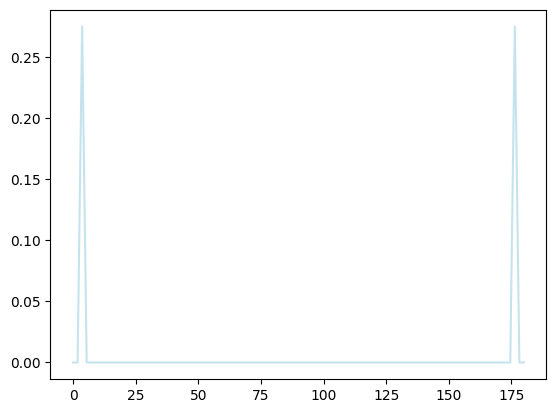

<Figure size 640x480 with 0 Axes>

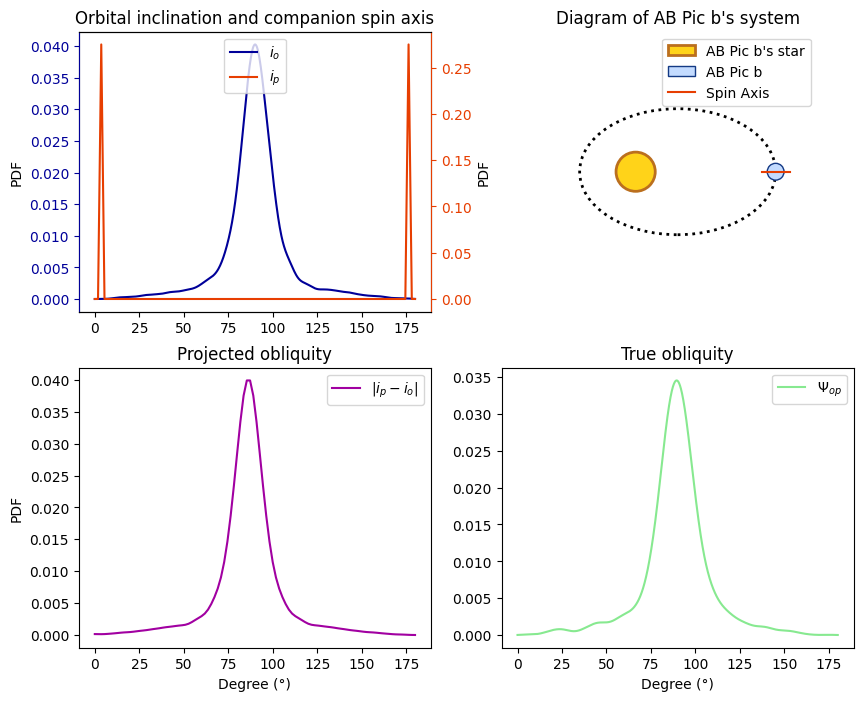

In [3]:
x = obliquity(exoplanet_name,io,radius,vsini,omega,P,M) 

#### **4 - Exoplanet object**

The variable **x** is now an Exoplanet object, so from that you can get interesting informations from it.

**a) Inputs data**

In [4]:
orbital_inclination_data = x.io
print('The data for the orbital inclination are:\n',orbital_inclination_data)

The data for the orbital inclination are:
 [ 50.75698015  88.71964237 137.76161852 ...  75.78755228  89.09312084
  83.5822658 ]


In [5]:
exoplanet_name = x.planet_name
print('The planet name is',exoplanet_name)

The planet name is AB Pic b


In [6]:
mass = x.mass
print('The mass of ' + exoplanet_name + ' is',mass)

The mass of AB Pic b is 10.0 jupiterMass


**b) Computed data**

In [7]:
spin_axis_data = x.ip
print('The data for the spin axis of ' + exoplanet_name + ' are: \n', spin_axis_data)

The data for the spin axis of AB Pic b are: 
 [  2.38273811   2.44705911 177.66848835 ... 177.63880261   2.37004602
 177.63324097]


In [8]:
true_obliquity_data = x.true_obli
print('The data for the true obliquity of ' + exoplanet_name + ' are: \n',true_obliquity_data)

The data for the true obliquity of AB Pic b are: 
 [ 48.45459759  86.31348711  40.01661664 ... 102.04936658  87.59748649
  95.98391226]


#### **5 - Plot class**

The variable **x** is an Exoplanet object, but it can also be mixed with a **Plot** class. 

Indeed from Exoplanet class method like <font color='purple'>**self.hist()**</font> or <font color='purple'>**self.pdf()**</font>, you can compute and plot histogram or PDF (Probabilty Density Function) of exoplanet's parameters.

After that using <font color='purple'>**self.plot()**</font> will plot the computed data.

**a) Histogram plot**

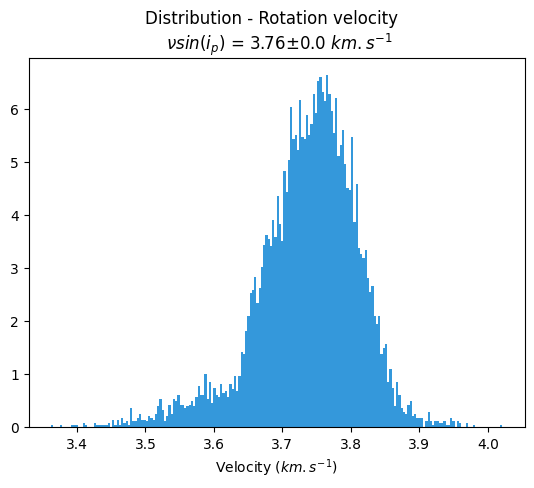

In [9]:
x.hist('Rotational velocity','#3498DB').plot()

**b) PDF plot**

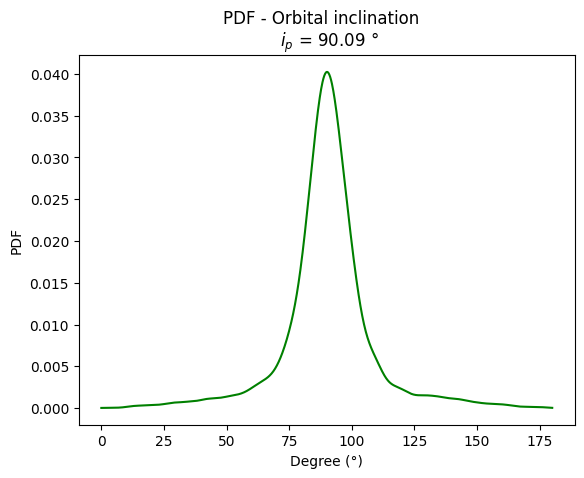

In [10]:
x.pdf('Orbital inclination','green').plot()

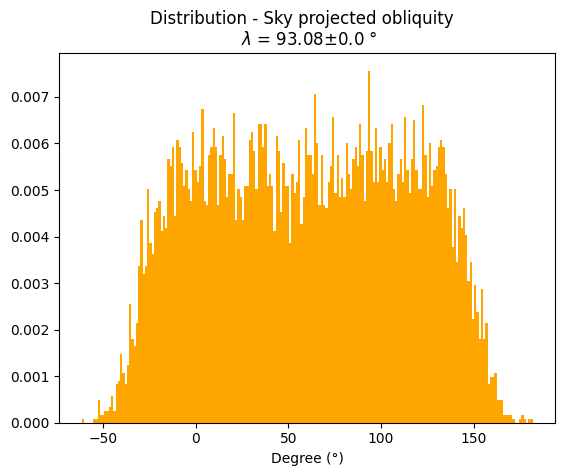

In [11]:
x.hist('Sky projected obliquity','orange').plot()

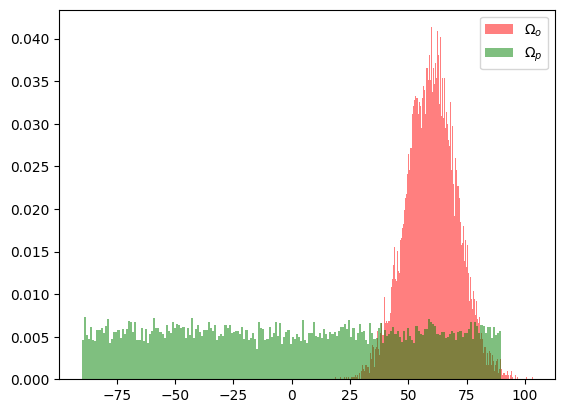

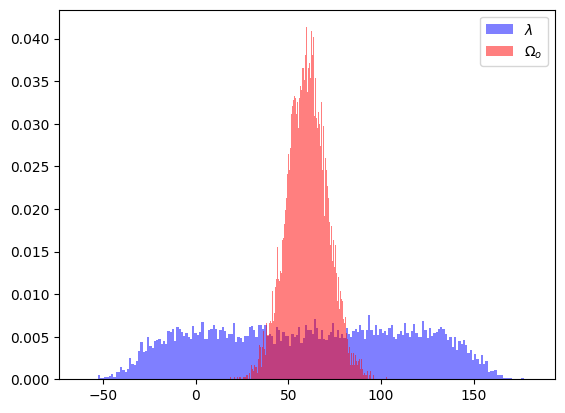

In [12]:

lambda_hist = x.hist('Sky projected obliquity')
o_hist = x.hist('Sky projected inclination')
p_hist = x.hist('Sky projected spin axis')

bins = lambda_hist.bins

plt.figure(1)
y1, x1, _ = plt.hist(o_hist.x, bins=bins,density=True,color='red',label='$\Omega_o$',alpha=0.5)
y1, x1, _ = plt.hist(p_hist.x, bins=bins,density=True,color='green',label='$\Omega_p$',alpha=0.5)
plt.legend()

plt.figure(2)
y1, x1, _ = plt.hist(lambda_hist.x, bins=bins,density=True,color='blue',label='$\lambda$',alpha=0.5)
y1, x1, _ = plt.hist(o_hist.x, bins=bins,density=True,color='red',label='$\Omega_o$',alpha=0.5)
plt.legend()


In [84]:
ip_pdf = x.ip_pdf_saved
n=ip_pdf.x.size
x_a = ip_pdf.x[:n//2]
y_a = ip_pdf.y[:n//2]

mean_ip = np.trapz(x_a*y_a, x_a)
var_ip = np.sqrt(np.trapz((x_a-mean_ip)**2 * y_a, x_a))
print(mean_ip)
print(var_ip)
print(ip_pdf.x.size)

io_pdf = x.pdf('Orbital inclination')
mean_io = np.trapz(io_pdf.x * io_pdf.y, io_pdf.x)
var_io = np.sqrt(np.trapz((io_pdf.x-mean_io)**2 * io_pdf.y, io_pdf.x))
print(mean_io)
print(var_io)
print(io_pdf.x.size)

pro_pdf = x.pdf('Projected obliquity - complex')
mean_pro = np.trapz(pro_pdf.x * pro_pdf.y, pro_pdf.x)
var_pro = np.sqrt(np.trapz((pro_pdf.x-mean_pro)**2 * pro_pdf.y, pro_pdf.x))
print(mean_pro)
print(var_pro)


print(pro_pdf.x)


1.818181818181822
1.2856486930664488
100


90.39063552440086
18.204170238648306
1000
86.36428535028084
18.22473278653268
[  0.           1.81818182   3.63636364   5.45454545   7.27272727
   9.09090909  10.90909091  12.72727273  14.54545455  16.36363636
  18.18181818  20.          21.81818182  23.63636364  25.45454545
  27.27272727  29.09090909  30.90909091  32.72727273  34.54545455
  36.36363636  38.18181818  40.          41.81818182  43.63636364
  45.45454545  47.27272727  49.09090909  50.90909091  52.72727273
  54.54545455  56.36363636  58.18181818  60.          61.81818182
  63.63636364  65.45454545  67.27272727  69.09090909  70.90909091
  72.72727273  74.54545455  76.36363636  78.18181818  80.
  81.81818182  83.63636364  85.45454545  87.27272727  89.09090909
  90.90909091  92.72727273  94.54545455  96.36363636  98.18181818
 100.         101.81818182 103.63636364 105.45454545 107.27272727
 109.09090909 110.90909091 112.72727273 114.54545455 116.36363636
 118.18181818 120.         121.81818182 123.63636364 125.45454545
 127.2

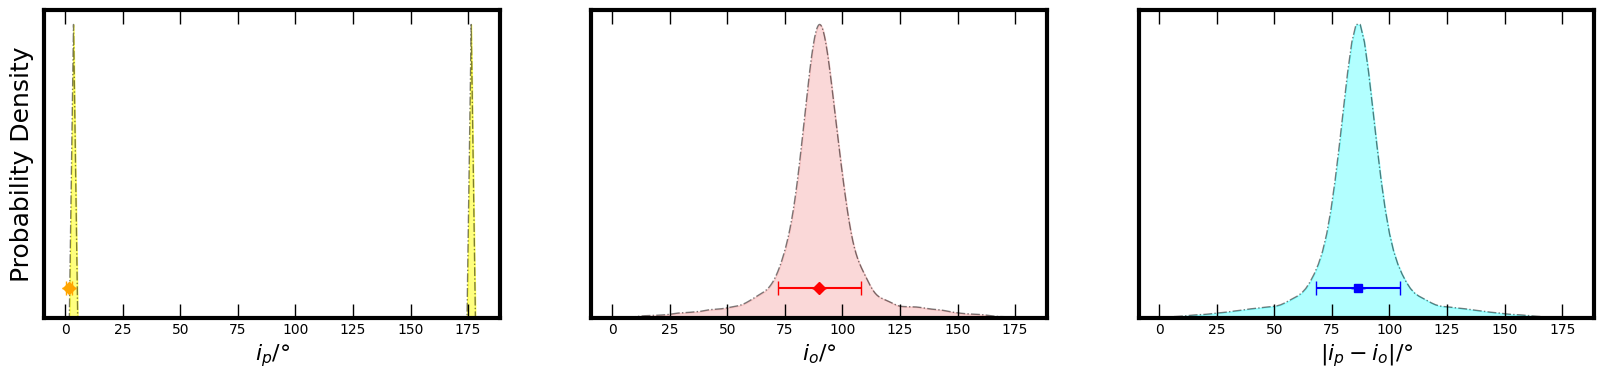

In [91]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,4))

ax1.plot(ip_pdf.x,ip_pdf.y, color='black', alpha=0.5, linewidth=1,linestyle="dashdot")
ax1.fill_between(ip_pdf.x,ip_pdf.y, color='yellow', alpha=0.5)
for spine in ax1.spines.values():
    spine.set_linewidth(3)
ax1.tick_params(axis='x', which='both', direction='in', length=10, width=1, top=True)
ax1.tick_params(axis='y', which='both', direction='in', length=0, width=1)
ax1.set_xlabel('$i_p$/°', fontsize=16)
ax1.set_ylabel('Probability Density', fontsize=18)
ax1.set_yticklabels([])
ax1.set_ylim(bottom=0)
ax1.errorbar(mean_ip, ip_pdf.y[2]*0.1, xerr=var_ip, yerr=0, fmt='D', color='orange', capsize=5)

ax2.plot(io_pdf.x,io_pdf.y, color='black', alpha=0.5, linewidth=1,linestyle="dashdot")
ax2.fill_between(io_pdf.x,io_pdf.y, color='lightcoral', alpha=0.3)
for spine in ax2.spines.values():
    spine.set_linewidth(3)
ax2.tick_params(axis='x', which='both', direction='in', length=10, width=1, top=True)
ax2.tick_params(axis='y', which='both', direction='in', length=0, width=1)
ax2.set_yticklabels([])
ax2.set_ylim(bottom=0)
ax2.set_xlabel('$i_o$/°', fontsize=16)
ax2.errorbar(90, io_pdf.y[500]*0.1, xerr=var_io, yerr=0, fmt='D', color='red', capsize=5)

ax3.plot(pro_pdf.x,pro_pdf.y, color='black', alpha=0.5, linewidth=1,linestyle="dashdot")
ax3.fill_between(pro_pdf.x,pro_pdf.y, color='cyan', alpha=0.3)
for spine in ax3.spines.values():
    spine.set_linewidth(3)
ax3.tick_params(axis='x', which='both', direction='in', length=10, width=1, top=True)
ax3.tick_params(axis='y', which='both', direction='in', length=0, width=1)
ax3.set_yticklabels([])
ax3.set_ylim(bottom=0)
ax3.set_xlabel('$|i_p - i_o|$/°', fontsize=16)
ax3.errorbar(mean_pro, pro_pdf.y[48]*0.1, xerr=var_pro, yerr=0, fmt='s', color='blue', capsize=5)


plt.show()


<ErrorbarContainer object of 3 artists>

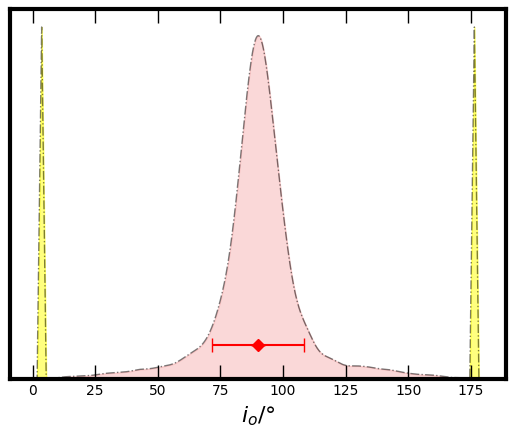

In [79]:
fig, ax2 = plt.subplots()


for spine in ax2.spines.values():
    spine.set_linewidth(3)
ax2.tick_params(axis='x', which='both', direction='in', length=10, width=1, top=True)
ax2.tick_params(axis='y', which='both', direction='in', length=0, width=1)
ax2.set_yticklabels([])
ax2.set_ylim(bottom=0)
ax2.set_xlabel('$i_o$/°', fontsize=16)
ax2.errorbar(90, io_pdf.y[500]*0.1, xerr=var_io, yerr=0, fmt='D', color='red', capsize=5)

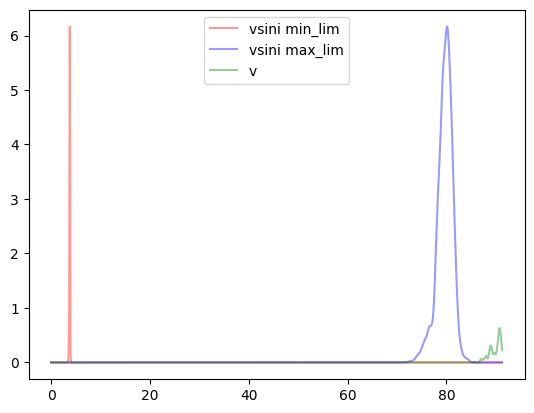

In [23]:
v_kde = kde(x.velocity)
vsin_kde = kde(x.vsini)
angles = np.linspace(0,np.pi,5)
v_range = np.linspace(0,x.v_lim.value,x.ip.size)

cos_k = 0.1
cos_p = 0.9989


plt.figure()
plt.plot(v_range, vsin_kde(v_range*np.sqrt(1-cos_k*cos_k)),label='vsini min_lim',color='red',alpha=0.4)
plt.plot(v_range, vsin_kde(v_range*np.sqrt(1-cos_p*cos_p)),label='vsini max_lim',color='blue',alpha=0.4)
plt.plot(v_range, v_kde(v_range),label='v',color='green',alpha=0.4)
plt.legend()



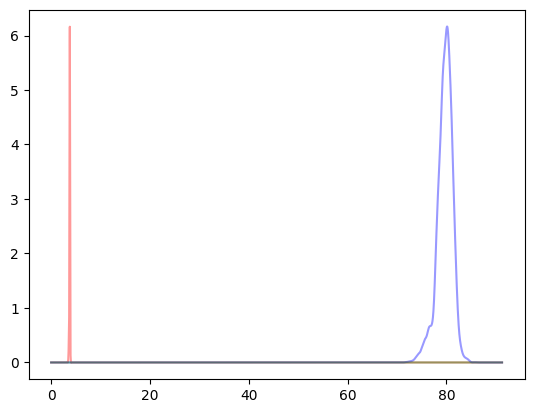

In [29]:
radius = np.random.normal(loc=1.87, scale=0.1, size=x.vsini.size) * u.Rjup
v = 2*np.pi*radius/x.period

v = v.to(u.km/u.s)



# y_, x_, _ = plt.hist(v.value, alpha=0.5,bins=200,density=True) 
cos_k = 0.1

cos_p = 0.9989
vsin_kde = kde(x.vsini)

plt.figure()
plt.plot(v_range, vsin_kde(v_range*np.sqrt(1-cos_k*cos_k)),label='vsini min_lim',color='red',alpha=0.4)
plt.plot(v_range, vsin_kde(v_range*np.sqrt(1-cos_p*cos_p)),label='vsini max_lim',color='blue',alpha=0.4)
plt.plot(v_range,v_pdf,label='v',color='green',alpha=0.4)
v_kde = gaussian_kde(v,bw_method='scott')
v_pdf = v_kde(v_range)

